In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import libraries

In [ ]:
import os
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
plt.style.use('dark_background')


from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.optimizers import Adam
from keras.layers import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D
from keras.callbacks import ModelCheckpoint

# Eval Function

In [ ]:
def eval(test,pred,val,pred_val):
  print('** Testing **')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)

  print('\n** Validate **')
  val_mae = mean_absolute_error(val, pred_val)
  print('MAE: ', val_mae)

  val_ape = np.abs((val - pred_val) / val)
  val_mape = np.mean(val_ape) * 100
  print('MAPE: ', val_mape)

  val_mse = mean_squared_error(val, pred_val)
  val_rmse = np.sqrt(val_mse)
  print('RMSE: ', val_rmse)

In [ ]:
def train_test_valid(data):
  train_size = int(0.7 * len(data))
  test_size = int(0.2 * len(data))
  val_size = len(data) - train_size - test_size

  train_data = data[:train_size]
  test_data = data[train_size:train_size+test_size]
  valid_data = data[train_size+test_size:]

  return train_data, test_data, valid_data, train_size, test_size, val_size

# HoaPhat_HPG

## Data

In [ ]:
df_amz = pd.read_csv("/content/drive/MyDrive/IS403_Phantichdulieukinhdoanh/Đồ án/Data/cleandata/HoaPhat_HPG_y_m_d.csv")
df_amz

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,10260.39,10443.02,10227.19,10227.19,10227.19,12637219.0
1,2019-01-03,10210.59,10260.39,9795.52,9795.52,9795.52,21178963.0
2,2019-01-04,9762.32,9961.55,9529.88,9861.93,9861.93,20085098.0
3,2019-01-07,10061.16,10077.77,9679.30,9745.71,9745.71,7495579.0
4,2019-01-08,9762.32,9795.52,9529.88,9579.69,9579.69,12767952.0
...,...,...,...,...,...,...,...
1537,2025-03-06,27600.00,27950.00,27600.00,27950.00,27950.00,37159600.0
1538,2025-03-07,28000.00,28100.00,27750.00,28050.00,28050.00,33131210.0
1539,2025-03-10,28100.00,28200.00,27950.00,27950.00,27950.00,23863520.0
1540,2025-03-11,27600.00,28150.00,27600.00,28150.00,28150.00,26088500.0


## Preprocessing

### Check null and na value

In [ ]:
df_amz.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
df_amz.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


### Check datatype of each column

In [ ]:
print("Date column data type: ", type(df_amz['Date'][0]))
print("Open column data type: ", type(df_amz['Open'][0]))
print("Close column data type: ", type(df_amz['Close'][0]))
print("High column data type: ", type(df_amz['High'][0]))
print("Low column data type: ", type(df_amz['Low'][0]))
print("Adj Close column data type: ", type(df_amz['Adj Close'][0]))
print("Volume column data type: ", type(df_amz['Low'][0]))

Date column data type:  <class 'str'>
Open column data type:  <class 'numpy.float64'>
Close column data type:  <class 'numpy.float64'>
High column data type:  <class 'numpy.float64'>
Low column data type:  <class 'numpy.float64'>
Adj Close column data type:  <class 'numpy.float64'>
Volume column data type:  <class 'numpy.float64'>


### Convert date from string to date format & reset index

In [ ]:
df_amz = df_amz.set_index(pd.DatetimeIndex(df_amz['Date'].values))

df_amz.index = pd.to_datetime(df_amz.index,format='%Y-%m-%d')

close_amz = pd.DataFrame(df_amz, columns=['Date', 'Close'])
close_amz.drop('Date', axis = 1, inplace = True)

## EDA

### Get the duration of dataset

In [ ]:
print("Starting date: ",df_amz.iloc[0][0])
print("Ending date: ", df_amz.iloc[-1][0])

Starting date:  2019-01-02
Ending date:  2025-03-12


<ipython-input-11-f85b7d6a4d52>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Starting date: ",df_amz.iloc[0][0])
<ipython-input-11-f85b7d6a4d52>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Ending date: ", df_amz.iloc[-1][0])


### Visualize the per day closing price of the stock

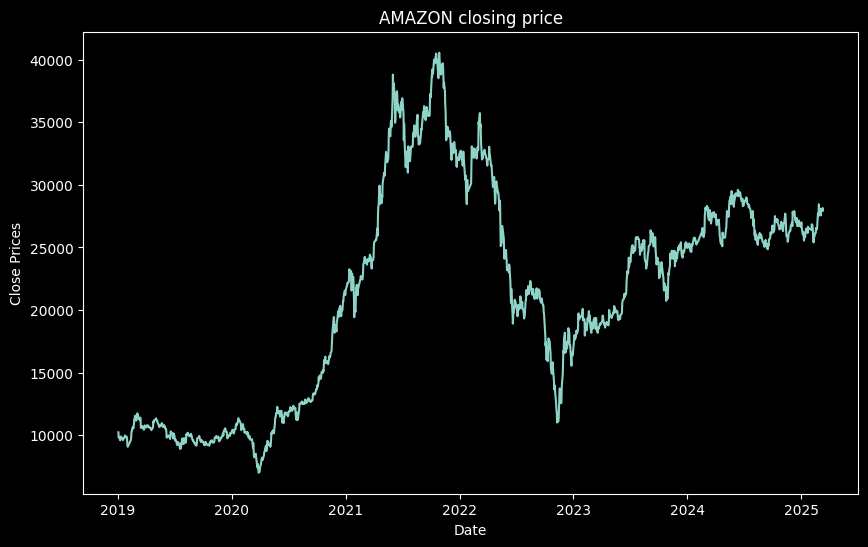

In [ ]:
plt.figure(figsize=(10,6))
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(close_amz['Close'])
plt.title(' closing price')
plt.show()

## Train, test, valid

In [ ]:
data_amz = close_amz.values
scaler = MinMaxScaler(feature_range=(0, 1))

sc_train = scaler.fit_transform(data_amz)

train_data, test_data, valid_data, train_size, test_size, val_size = train_test_valid(sc_train)

In [ ]:
x_train, y_train = [], []

for i in range(100, len(train_data)):
    x_train.append(sc_train[i-100:i, 0])
    y_train.append(sc_train[i, 0])

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

## Build & train model

In [ ]:
model = Sequential()

model.add(Conv1D(8, kernel_size = (1), strides = (1),  padding = 'valid',
               activation = 'relu', input_shape = (100,1)))
model.add(MaxPooling1D(pool_size = (1)))

model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="relu"))

model.compile(loss='mean_absolute_error', optimizer='adam')

save_model = '/content/drive/MyDrive/IS403_Phantichdulieukinhdoanh/Đồ án/Model/CNN_HoaPhat_HPG_721.keras'

best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: loss improved from inf to 0.14238, saving model to /content/drive/MyDrive/IS403_Phantichdulieukinhdoanh/Đồ án/Model/CNN_HoaPhat_HPG_721.keras
20/20 - 2s - 88ms/step - loss: 0.1424
Epoch 2/80

Epoch 2: loss improved from 0.14238 to 0.09999, saving model to /content/drive/MyDrive/IS403_Phantichdulieukinhdoanh/Đồ án/Model/CNN_HoaPhat_HPG_721.keras
20/20 - 0s - 7ms/step - loss: 0.1000
Epoch 3/80

Epoch 3: loss improved from 0.09999 to 0.09345, saving model to /content/drive/MyDrive/IS403_Phantichdulieukinhdoanh/Đồ án/Model/CNN_HoaPhat_HPG_721.keras
20/20 - 0s - 15ms/step - loss: 0.0934
Epoch 4/80

Epoch 4: loss improved from 0.09345 to 0.09092, saving model to /content/drive/MyDrive/IS403_Phantichdulieukinhdoanh/Đồ án/Model/CNN_HoaPhat_HPG_721.keras
20/20 - 0s - 8ms/step - loss: 0.0909
Epoch 5/80

Epoch 5: loss improved from 0.09092 to 0.08684, saving model to /content/drive/MyDrive/IS403_Phantichdulieukinhdoanh/Đồ án/Model/CNN_HoaPhat_HPG_721.keras
20/20 - 0s - 8m

## Eval

In [ ]:
y_train = scaler.inverse_transform(y_train)

final_model = load_model('/content/drive/MyDrive/IS403_Phantichdulieukinhdoanh/Đồ án/Model/CNN_HoaPhat_HPG_721.keras')

y_train_predict = final_model.predict(x_train)

y_train_predict = scaler.inverse_transform(y_train_predict)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [ ]:
test = close_amz[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = scaler.transform(test)

x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

y_test = data_amz[train_size:train_size+test_size]  # True values

y_test_predict = final_model.predict(x_test)

y_test_predict = scaler.inverse_transform(y_test_predict)  # Predicted values

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [ ]:
val = close_amz[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = scaler.transform(val)

x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

y_val = data_amz[train_size+test_size:]  # True values

y_val_predict = final_model.predict(x_val)

y_val_predict = scaler.inverse_transform(y_val_predict)  # Predicted values

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [ ]:
train_data = close_amz[:train_size]
test_data = close_amz[train_size:train_size+test_size]
val_data = close_amz[train_size+test_size:]

In [ ]:
eval(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  753.5288859577923
MAPE:  2.9914279135986814
RMSE:  935.2666691970662

** Validate **
MAE:  717.7459425403226
MAPE:  2.676163832434719
RMSE:  856.8621793409447


## Predict

In [ ]:
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)
print(x_input.shape)

temp_input = list(x_input)
temp_input = temp_input[0].tolist()
print(temp_input)

(1, 100)
[0.5975312239043593, 0.6005103908875624, 0.5990208073959609, 0.6034895578707655, 0.594552056921156, 0.5885937229547498, 0.5856145559715467, 0.5796562220051402, 0.5796562220051402, 0.5796562220051402, 0.5885937229547498, 0.5975312239043593, 0.5930624734295544, 0.5826353889883433, 0.5751874715303356, 0.594552056921156, 0.594552056921156, 0.5960416404127575, 0.6168958092951797, 0.6109374753287735, 0.5975312239043593, 0.5751874715303356, 0.5632708035975229, 0.5602916366143198, 0.5498645521731087, 0.5543333026479134, 0.5617812201059214, 0.5692291375639291, 0.5751874715303356, 0.5766770550219371, 0.5751874715303356, 0.5781666385135387, 0.5885937229547498, 0.5930624734295544, 0.5960416404127575, 0.5871041394631482, 0.6213645597699844, 0.6139166423119766, 0.6154062258035782, 0.622854143261586, 0.6183853927867813, 0.6109374753287735, 0.601999974379164, 0.5960416404127575, 0.5960416404127575, 0.6064687248539686, 0.5915728899379529, 0.5871041394631482, 0.5960416404127575, 0.5871041394631

In [ ]:
lst_output = []
n_steps = 100
i = 0

while(i < 30):
    if(len(temp_input) > 100):
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)

        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)

        temp_input.extend(yhat[0].tolist())

        lst_output.extend(yhat.tolist())
        i += 1

print(lst_output)

[[0.609362781047821], [0.6065768003463745], [0.6064693927764893], [0.604425311088562], [0.6055362224578857], [0.6029853820800781], [0.599470853805542], [0.5980401039123535], [0.5937018394470215], [0.5908873081207275], [0.589554488658905], [0.5890235900878906], [0.5873374938964844], [0.5874959230422974], [0.5847227573394775], [0.5828199982643127], [0.582184910774231], [0.5792390704154968], [0.5803693532943726], [0.57811439037323], [0.5779471397399902], [0.578076958656311], [0.5767018795013428], [0.5740160346031189], [0.5701066255569458], [0.5703002214431763], [0.5628819465637207], [0.5611041784286499], [0.5564751625061035], [0.553931474685669]]


In [ ]:
datelist_train = df_amz['Date'].astype(str).tolist()

datelist_train = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in datelist_train]

datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

In [ ]:
y_pred_future = scaler.inverse_transform(lst_output)

print(y_pred_future)

[[27447.14313465]
 [27353.62770845]
 [27350.02241977]
 [27281.40989488]
 [27318.6992236 ]
 [27233.07661861]
 [27115.1064513 ]
 [27067.08128517]
 [26921.46123467]
 [26826.98746592]
 [26782.24947475]
 [26764.42910503]
 [26707.83287525]
 [26713.15077608]
 [26620.06550364]
 [26556.19667434]
 [26534.87905456]
 [26435.99771037]
 [26473.9372715 ]
 [26398.24621646]
 [26392.63220978]
 [26396.98976735]
 [26350.83326915]
 [26260.67904438]
 [26129.45413929]
 [26135.95246206]
 [25886.94745759]
 [25827.27412793]
 [25671.894589  ]
 [25586.51206983]]


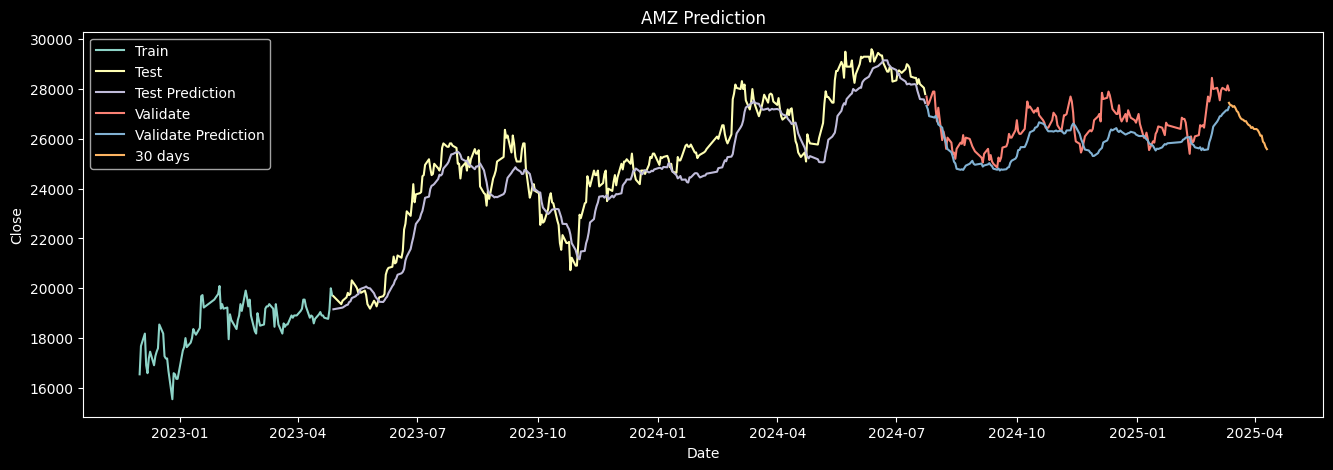

In [ ]:
y_pred_future = scaler.inverse_transform(lst_output)

PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['Close']).set_index(pd.Series(datelist_future))

plt.figure(figsize=(16,5))
plt.plot(train_data.index[train_size-100:], train_data.Close[train_size-100:])
plt.plot(test_data)

plt.plot(test_data.index, y_test_predict)
plt.plot(val_data)
plt.plot(val_data.index, y_val_predict)

plt.plot(PREDICTIONS_FUTURE)
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('AMZ Prediction')
plt.legend(['Train','Test','Test Prediction','Validate', 'Validate Prediction','30 days'])
plt.show()

# NamKim_NKG

## Data

In [ ]:
df_tsla = pd.read_csv("/content/drive/MyDrive/IS403_Phantichdulieukinhdoanh/Đồ án/Data/cleandata/NamKim_NKG_y_m_d.csv")
df_tsla

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,4565.97,4577.55,4403.94,4403.94,4403.94,65576.0
1,2019-01-03,4403.94,4496.53,4195.60,4195.60,4195.60,559110.0
2,2019-01-04,4195.60,4195.60,3946.76,4079.86,4079.86,116707.0
3,2019-01-07,4079.86,4224.54,4079.86,4079.86,4079.86,132570.0
4,2019-01-08,4079.86,4155.09,4056.71,4079.86,4079.86,137979.0
...,...,...,...,...,...,...,...
1540,2025-03-06,15550.00,16100.00,15500.00,16100.00,16100.00,14202800.0
1541,2025-03-07,16050.00,16300.00,15900.00,16100.00,16100.00,10169700.0
1542,2025-03-10,16150.00,16200.00,15700.00,15800.00,15800.00,9795200.0
1543,2025-03-11,15500.00,16100.00,15400.00,16100.00,16100.00,14542500.0


## Preprocessing

### Check null and na value

In [ ]:
df_tsla.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
df_tsla.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


### Check datatype of each column

In [ ]:
print("Date column data type: ", type(df_tsla['Date'][0]))
print("Open column data type: ", type(df_tsla['Open'][0]))
print("Close column data type: ", type(df_tsla['Close'][0]))
print("High column data type: ", type(df_tsla['High'][0]))
print("Low column data type: ", type(df_tsla['Low'][0]))
print("Adj Close column data type: ", type(df_tsla['Adj Close'][0]))
print("Volume column data type: ", type(df_tsla['Low'][0]))

Date column data type:  <class 'str'>
Open column data type:  <class 'numpy.float64'>
Close column data type:  <class 'numpy.float64'>
High column data type:  <class 'numpy.float64'>
Low column data type:  <class 'numpy.float64'>
Adj Close column data type:  <class 'numpy.float64'>
Volume column data type:  <class 'numpy.float64'>


## EDA

### Get the duration of dataset

In [ ]:
print("Starting date: ",df_tsla.iloc[0][0])
print("Ending date: ", df_tsla.iloc[-1][0])

Starting date:  2019-01-02
Ending date:  2025-03-12


<ipython-input-31-1625b6c5d97d>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Starting date: ",df_tsla.iloc[0][0])
<ipython-input-31-1625b6c5d97d>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Ending date: ", df_tsla.iloc[-1][0])


### Visualize the per day closing price of the stock

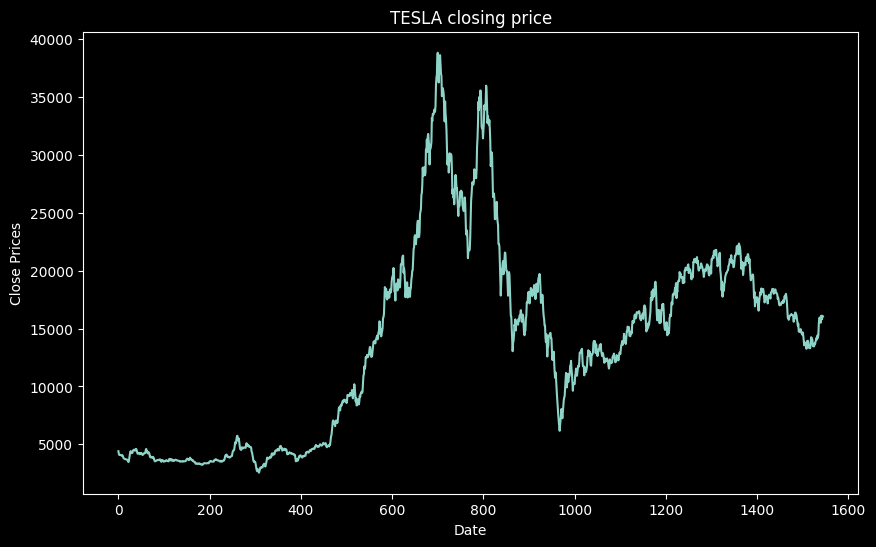

In [ ]:
plt.figure(figsize=(10,6))
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(df_tsla['Close'])
plt.title('TESLA closing price')
plt.show()

## Train, test, valid

### Convert date from string to date format & reset index

In [ ]:
df_tsla = df_tsla.set_index(pd.DatetimeIndex(df_tsla['Date'].values))

df_tsla.index = pd.to_datetime(df_tsla.index,format='%Y-%m-%d')

close_tsla = pd.DataFrame(df_tsla, columns=['Date', 'Close'])
close_tsla.drop('Date', axis = 1, inplace = True)

### Split

In [ ]:
data_tsla = close_tsla.values
scaler = MinMaxScaler(feature_range=(0, 1))

sc_train = scaler.fit_transform(data_tsla)

train_data, test_data, valid_data, train_size, test_size, val_size = train_test_valid(sc_train)

In [ ]:
x_train, y_train = [], []

for i in range(100, len(train_data)):
    x_train.append(sc_train[i-100:i, 0])
    y_train.append(sc_train[i, 0])

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

## Build model

In [ ]:
model = Sequential()

model.add(Conv1D(8, kernel_size = (1), strides = (1),  padding = 'valid',
               activation = 'relu', input_shape = (100,1)))
model.add(MaxPooling1D(pool_size = (1)))

model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="relu"))

model.compile(loss='mean_absolute_error', optimizer='adam')

save_model = '/content/drive/MyDrive/IS403_Phantichdulieukinhdoanh/Đồ án/Model/CNN_NamKim_NKG_721.keras'

best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80

Epoch 1: loss improved from inf to 0.13602, saving model to /content/drive/MyDrive/IS403_Phantichdulieukinhdoanh/Đồ án/Model/CNN_NamKim_NKG_721.keras
20/20 - 2s - 75ms/step - loss: 0.1360
Epoch 2/80

Epoch 2: loss improved from 0.13602 to 0.08689, saving model to /content/drive/MyDrive/IS403_Phantichdulieukinhdoanh/Đồ án/Model/CNN_NamKim_NKG_721.keras
20/20 - 0s - 15ms/step - loss: 0.0869
Epoch 3/80

Epoch 3: loss improved from 0.08689 to 0.07143, saving model to /content/drive/MyDrive/IS403_Phantichdulieukinhdoanh/Đồ án/Model/CNN_NamKim_NKG_721.keras
20/20 - 0s - 15ms/step - loss: 0.0714
Epoch 4/80

Epoch 4: loss improved from 0.07143 to 0.06104, saving model to /content/drive/MyDrive/IS403_Phantichdulieukinhdoanh/Đồ án/Model/CNN_NamKim_NKG_721.keras
20/20 - 0s - 15ms/step - loss: 0.0610
Epoch 5/80

Epoch 5: loss did not improve from 0.06104
20/20 - 0s - 13ms/step - loss: 0.0618
Epoch 6/80

Epoch 6: loss did not improve from 0.06104
20/20 - 0s - 14ms/step - los

## Eval

In [ ]:
y_train = scaler.inverse_transform(y_train)

final_model = load_model('/content/drive/MyDrive/IS403_Phantichdulieukinhdoanh/Đồ án/Model/CNN_NamKim_NKG_721.keras')

y_train_predict = final_model.predict(x_train)

y_train_predict = scaler.inverse_transform(y_train_predict)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [ ]:
test = close_tsla[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = scaler.transform(test)

x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

y_test = data_tsla[train_size:train_size+test_size]  # True values

y_test_predict = final_model.predict(x_test)

y_test_predict = scaler.inverse_transform(y_test_predict)  # Predicted values

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [ ]:
val = close_tsla[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = scaler.transform(val)

x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

y_val = data_tsla[train_size+test_size:]  # True values

y_val_predict = final_model.predict(x_val)

y_val_predict = scaler.inverse_transform(y_val_predict)  # Predicted values

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [ ]:
train_data = close_tsla[:train_size]
test_data = close_tsla[train_size:train_size+test_size]
val_data = close_tsla[train_size+test_size:]

In [ ]:
eval(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  916.3387185224514
MAPE:  5.036230623603339
RMSE:  1075.2769992456615

** Validate **
MAE:  774.7730541834677
MAPE:  4.708465809973618
RMSE:  912.2615991195926


## Predict

In [ ]:
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)
print(x_input.shape)

temp_input = list(x_input)
temp_input = temp_input[0].tolist()
print(temp_input)

(1, 100)
[0.4134013726406447, 0.4168474477678393, 0.40995529751345006, 0.40076558005025764, 0.3984682885274646, 0.39961707213186615, 0.39961707213186615, 0.39961707213186615, 0.40536043878185385, 0.4065092223862554, 0.4042116551774523, 0.4042116551774523, 0.41110380543184155, 0.40536043878185385, 0.40995529751345006, 0.4202935228950339, 0.4168474477678393, 0.42259081441782703, 0.42603688954502167, 0.4179959556862308, 0.4065092223862554, 0.3858327716230876, 0.3686023959871145, 0.3697509039055059, 0.36400753725551827, 0.3686023959871145, 0.37319697903270055, 0.3743457626371021, 0.3743457626371021, 0.3766430541598952, 0.37779183776429676, 0.37549454624150375, 0.37549454624150375, 0.37549454624150375, 0.37089968750990754, 0.359412678523922, 0.37319697903270055, 0.3663048287783113, 0.3812379128914914, 0.3812379128914914, 0.37779183776429676, 0.37549454624150375, 0.3663048287783113, 0.359412678523922, 0.3502232367467397, 0.3548180954783359, 0.3364389362379612, 0.3364389362379612, 0.335060506

In [ ]:
lst_output = []
n_steps = 100
i = 0

while(i < 30):
    if(len(temp_input) > 100):
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)

        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)

        temp_input.extend(yhat[0].tolist())

        lst_output.extend(yhat.tolist())
        i += 1

print(lst_output)

[[0.34528741240501404], [0.3431238830089569], [0.3409997522830963], [0.33537501096725464], [0.33051201701164246], [0.32544562220573425], [0.32088106870651245], [0.3149438500404358], [0.30777356028556824], [0.30064553022384644], [0.2952570617198944], [0.28906211256980896], [0.2817726135253906], [0.2744424641132355], [0.26831626892089844], [0.26384687423706055], [0.2582843005657196], [0.2539156973361969], [0.24731439352035522], [0.24353674054145813], [0.237779438495636], [0.23396462202072144], [0.2299180030822754], [0.22318431735038757], [0.21852412819862366], [0.21384084224700928], [0.20884178578853607], [0.203007310628891], [0.19879239797592163], [0.19312769174575806]]


In [ ]:
datelist_train = df_tsla['Date'].astype(str).tolist()

datelist_train = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in datelist_train]

datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

In [ ]:
y_pred_future = scaler.inverse_transform(lst_output)

print(y_pred_future)

[[15070.96210328]
 [14992.48407697]
 [14915.43516453]
 [14711.40807907]
 [14535.01196987]
 [14351.23787111]
 [14185.66713735]
 [13970.30551409]
 [13710.21651827]
 [13451.66041464]
 [13256.20368832]
 [13031.49336856]
 [12767.0802763 ]
 [12501.19266715]
 [12278.97627001]
 [12116.85724623]
 [11915.08517707]
 [11756.62217683]
 [11517.17209332]
 [11380.14472017]
 [11171.30923947]
 [11032.93382925]
 [10886.1502135 ]
 [10641.8982209 ]
 [10472.85848077]
 [10302.98094695]
 [10121.64942218]
 [ 9910.01462954]
 [ 9757.12647064]
 [ 9551.64973185]]


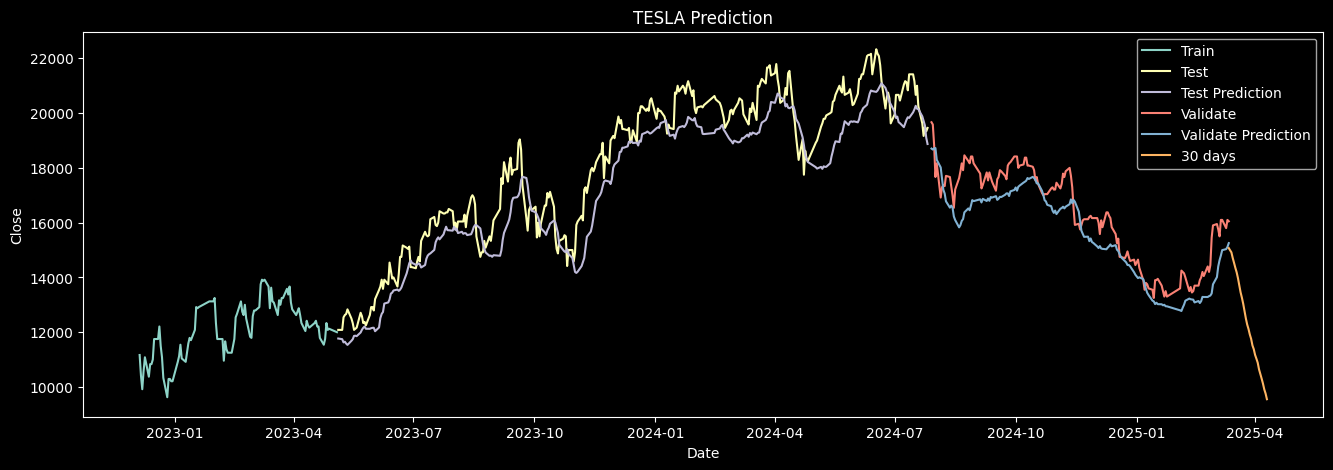

In [ ]:
y_pred_future = scaler.inverse_transform(lst_output)

PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['Close']).set_index(pd.Series(datelist_future))

plt.figure(figsize=(16,5))

plt.plot(train_data.index[train_size-100:], train_data.Close[train_size-100:])
plt.plot(test_data)

plt.plot(test_data.index, y_test_predict)
plt.plot(val_data)
plt.plot(val_data.index, y_val_predict)

plt.plot(PREDICTIONS_FUTURE)
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('TESLA Prediction')
plt.legend(['Train','Test','Test Prediction','Validate', 'Validate Prediction','30 days'])
plt.show()